# Pre-workshop: Installing required libraries

In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

# Step 1: Import important libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [4]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-4-9f436f4beb9c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Step 2: Read data file

In [7]:
# read csv file and save it in a data frame
clean_data=pd.read_csv('demo1.csv',encoding='utf-8') 

# Step 3: Explore that data

In [8]:
# how much data do I have?
len(clean_data)

1990

In [9]:
# How about if I want to see part of the data?
#data_df[1000:1200]
clean_data.head()

,tweetText
0,uphill task students kargil attend online classes atop mountain students village indopak border walk two kilometres every day climbing mountain attend online classes due lack internet connectivity village
1,uphill task students kargil village attend online classes atop mountain via thewirein
2,would like work online tutor like josephine visit us information tuition tutoring isolation education corona tutoringservices homeschoolinguk parenting onlinetutoring homeschooling gcse alevels exams
3,hard imagine highered could maintained semblance business usual without online learning lms place spoke leading universities take edtech latest whitepaper
4,greece second city thessaloniki gone near total lockdown morning people still allowed go work primary middle schools still open senior high schools higher education switched online classes


# Step 4: apply the lexicon 

In [14]:
# read positive words list
pos_df=pd.read_csv("posList.csv")

In [15]:
pos_df

,Positive
0,acclamation
1,accolade
2,accolades
3,accommodative
4,accomodative
5,accomplish
6,accomplished
7,accomplishment
8,accomplishments
9,accurate


In [16]:
pos_list=pos_df["Positive"].values.tolist()

In [17]:
pos_list

['acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordably',
 'afordable',
 'agile',
 'agilely',
 'agility',
 'agreeable',
 'agreeableness',
 'agreeably',
 'all-ar

In [ ]:
# apply the list to the data

In [18]:
def pos_sentiment(tweet):
    count=0
    # loop through the list of words and see if they are in the tweet text
    for Positive in pos_list:
        
        if Positive in tweet:
            count+=1
    
    return count

In [ ]:
#data_df['tweetText'].astype(str)

In [19]:
#apply the method to the data
clean_data["pos_count"] = clean_data['tweetText'].apply(lambda x: pos_sentiment(x))

In [20]:
clean_data.head()

,tweetText,pos_count
0,uphill task students kargil attend online classes atop mountain students village indopak border walk two kilometres every day climbing mountain attend online classes due lack internet connectivity village,1
1,uphill task students kargil village attend online classes atop mountain via thewirein,1
2,would like work online tutor like josephine visit us information tuition tutoring isolation education corona tutoringservices homeschoolinguk parenting onlinetutoring homeschooling gcse alevels exams,2
3,hard imagine highered could maintained semblance business usual without online learning lms place spoke leading universities take edtech latest whitepaper,2
4,greece second city thessaloniki gone near total lockdown morning people still allowed go work primary middle schools still open senior high schools higher education switched online classes,1


In [21]:
# read negative words list
neg_df=pd.read_csv('negList.csv',encoding='latin-1')

In [22]:
neg_df

,Negative
0,abnormal
1,abolish
2,abominable
3,abominably
4,abominate
5,abomination
6,abort
7,aborted
8,aborts
9,abrade


In [23]:
neg_list=neg_df["Negative"].values.tolist()

In [24]:
neg_list

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',

In [25]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for Negative in neg_list:
        if Negative in tweet:
            count+=1
               
    return count

In [26]:
#apply the method to the data
clean_data["neg_count"] = clean_data['tweetText'].apply(lambda x: neg_sentiment(x))

In [27]:
clean_data.head(100)

,tweetText,pos_count,neg_count
0,uphill task students kargil attend online classes atop mountain students village indopak border walk two kilometres every day climbing mountain attend online classes due lack internet connectivity village,1,4
1,uphill task students kargil village attend online classes atop mountain via thewirein,1,4
2,would like work online tutor like josephine visit us information tuition tutoring isolation education corona tutoringservices homeschoolinguk parenting onlinetutoring homeschooling gcse alevels exams,2,2
3,hard imagine highered could maintained semblance business usual without online learning lms place spoke leading universities take edtech latest whitepaper,2,4
4,greece second city thessaloniki gone near total lockdown morning people still allowed go work primary middle schools still open senior high schools higher education switched online classes,1,2
5,britain teaching unions disgrace education jeremyvine bbcnews skynews itvnews bbcbreakfast bbcpm wato newsnight politicslive,2,3
6,boys latoo village kargil district indopak border walk km every day climbing mountain attend online classes due lack internet connectivity girls wait boys return evening study material,0,3
7,stress education teachers feel conducting online virtual learning stressful classroom teaching see poll results,0,4
8,children learned little nothing school closures despite online learning lockdown education schooling coronavirus corona melindacmills oxforddemsci bisschoolgag michaelpiazolo kmbayern,0,2
9,healthcare professionals countries taken free online course criticalcare futurelearn sign run course starts next week relevant working critical care globally rcpedin,3,3


## Ok! but its not enough to know how many positive and negative words in each tweet. 
## We want to learn which tweet is positive and which is negative.

In [28]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent:
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [29]:
clean_data["sentiment"] = clean_data['tweetText'].apply(lambda x: tweet_sentiment(x))

In [30]:
clean_data.head(100)

,tweetText,pos_count,neg_count,sentiment
0,uphill task students kargil attend online classes atop mountain students village indopak border walk two kilometres every day climbing mountain attend online classes due lack internet connectivity village,1,4,Negative
1,uphill task students kargil village attend online classes atop mountain via thewirein,1,4,Negative
2,would like work online tutor like josephine visit us information tuition tutoring isolation education corona tutoringservices homeschoolinguk parenting onlinetutoring homeschooling gcse alevels exams,2,2,Neutral
3,hard imagine highered could maintained semblance business usual without online learning lms place spoke leading universities take edtech latest whitepaper,2,4,Negative
4,greece second city thessaloniki gone near total lockdown morning people still allowed go work primary middle schools still open senior high schools higher education switched online classes,1,2,Negative
5,britain teaching unions disgrace education jeremyvine bbcnews skynews itvnews bbcbreakfast bbcpm wato newsnight politicslive,2,3,Negative
6,boys latoo village kargil district indopak border walk km every day climbing mountain attend online classes due lack internet connectivity girls wait boys return evening study material,0,3,Negative
7,stress education teachers feel conducting online virtual learning stressful classroom teaching see poll results,0,4,Negative
8,children learned little nothing school closures despite online learning lockdown education schooling coronavirus corona melindacmills oxforddemsci bisschoolgag michaelpiazolo kmbayern,0,2,Negative
9,healthcare professionals countries taken free online course criticalcare futurelearn sign run course starts next week relevant working critical care globally rcpedin,3,3,Neutral


In [31]:
df = pd.DataFrame(clean_data, columns = ['tweetText', 'pos_count', 'neg_count', 'sentiment'])
df.to_csv('table1.csv')

# Step 5: Explore the results

In [32]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = clean_data['sentiment'].value_counts()

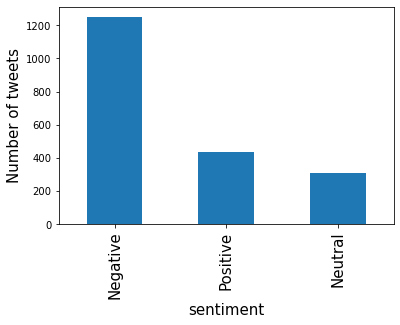

In [40]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)


tweets_by_sentiment.plot(ax=ax, kind='bar')

# Step 6: Clean the text

## Convert text to tokens

In [46]:
tokenizer = RegexpTokenizer(r'\w+')
clean_data["tokens"] = clean_data["tweetText"].apply(tokenizer.tokenize)

In [47]:
clean_data.head()

,tweetText,pos_count,neg_count,sentiment,tokens
0,uphill task students kargil attend online classes atop mountain students village indopak border walk two kilometres every day climbing mountain attend online classes due lack internet connectivity village,1,4,Negative,"[uphill, task, students, kargil, attend, online, classes, atop, mountain, students, village, indopak, border, walk, two, kilometres, every, day, climbing, mountain, attend, online, classes, due, lack, internet, connectivity, village]"
1,uphill task students kargil village attend online classes atop mountain via thewirein,1,4,Negative,"[uphill, task, students, kargil, village, attend, online, classes, atop, mountain, via, thewirein]"
2,would like work online tutor like josephine visit us information tuition tutoring isolation education corona tutoringservices homeschoolinguk parenting onlinetutoring homeschooling gcse alevels exams,2,2,Neutral,"[would, like, work, online, tutor, like, josephine, visit, us, information, tuition, tutoring, isolation, education, corona, tutoringservices, homeschoolinguk, parenting, onlinetutoring, homeschooling, gcse, alevels, exams]"
3,hard imagine highered could maintained semblance business usual without online learning lms place spoke leading universities take edtech latest whitepaper,2,4,Negative,"[hard, imagine, highered, could, maintained, semblance, business, usual, without, online, learning, lms, place, spoke, leading, universities, take, edtech, latest, whitepaper]"
4,greece second city thessaloniki gone near total lockdown morning people still allowed go work primary middle schools still open senior high schools higher education switched online classes,1,2,Negative,"[greece, second, city, thessaloniki, gone, near, total, lockdown, morning, people, still, allowed, go, work, primary, middle, schools, still, open, senior, high, schools, higher, education, switched, online, classes]"


In [48]:
all_words = [word for tokens in clean_data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_data["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

36938 words total, with a vocabulary size of 8928
Max sentence length is 47


In [49]:
# count the number of words
word_counter = Counter(all_words)

In [50]:
# show the most common words
word_counter.most_common(5)

[('online', 1258),
 ('teaching', 1018),
 ('university', 410),
 ('learning', 396),
 ('students', 370)]

In [52]:
# Display 10 least common lines
word_counter.most_common()[-5:]

[('chats', 1),
 ('livrainforest', 1),
 ('berkshire', 1),
 ('rainforest', 1),
 ('ecosystem', 1)]

## For people who have a positive sentiment towerds E-learning during Covid-19, What is the top words they use?

In [71]:
for_df=clean_data[clean_data["sentiment"]=="Positive"]

In [72]:
For_words = [ word for tokens in for_df["tokens"] for word in tokens]

In [73]:
for_word_counter = Counter(For_words)

In [74]:
for_word_counter.most_common(30)

[]

## For people who have a negative sentiment towerds E-learning during Covid-19, What is the top words they use?


In [63]:
against_df=clean_data[clean_data["sentiment"]=="Negative"]

In [64]:
against_words = [ word for tokens in against_df["tokens"] for word in tokens]

In [65]:
against_word_counter = Counter(against_words)

In [66]:
against_word_counter.most_common(30)

[('online', 820),
 ('teaching', 703),
 ('students', 300),
 ('amp', 244),
 ('learning', 243),
 ('university', 231),
 ('education', 202),
 ('not', 181),
 ('virtual', 134),
 ('school', 110),
 ('new', 93),
 ('people', 89),
 ('us', 89),
 ('schools', 86),
 ('join', 81),
 ('time', 78),
 ('live', 77),
 ('week', 76),
 ('pandemic', 75),
 ('home', 73),
 ('open', 72),
 ('student', 68),
 ('work', 67),
 ('event', 67),
 ('today', 64),
 ('book', 62),
 ('lockdown', 61),
 ('year', 61),
 ('day', 58),
 ('teachers', 57)]

# Step 6: ML Classification

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [58]:
# remove the "Neutral" class
clean_data=clean_data[clean_data['sentiment'] != "Neutral"]

/Users/norahalkathiri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [59]:
# change values to numeric
clean_data['sentiment'] = clean_data['sentiment'].map({'Positive': 1, 'Negative': 0}) 

In [60]:
# idneitfy the data and the labels
data= clean_data['tweetText']
target= clean_data['sentiment']

In [61]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(1682, 8100)

In [63]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [64]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(841, 8100) (841, 8100) (841,) (841,)


## SVM Classifier

In [74]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

SVM accuracy: 0.79


In [75]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))


10-fold cross-validation:
[0.76331361 0.81656805 0.75595238 0.80357143 0.79761905 0.76190476
 0.7797619  0.77380952 0.79761905 0.79166667]
The average accuracy of the SVM classifier is : 0.78


In [76]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


Confusion matrix of the SVM classifier:
[[615   7]
 [170  49]]


In [77]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")


Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       622
           1       0.88      0.22      0.36       219

    accuracy                           0.79       841
   macro avg       0.83      0.61      0.62       841
weighted avg       0.81      0.79      0.74       841

----------------------------------------------------------------------------


In [78]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

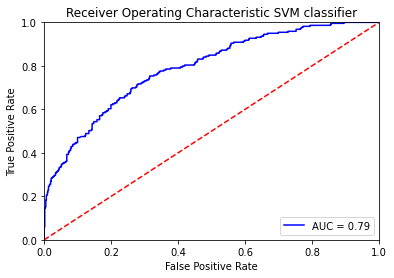

In [79]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       


In [81]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)

Top Positive Coefficients
fantastic 1.0356948945084157
team 1.0536341131592795
postgraduate 1.0593101308229103
thank 1.0658530598442952
institute 1.0912066244334804
great 1.1596557800916207
evening 1.1969347884490913
well 1.2288623556409237
work 1.2463193127687457
piece 1.2656884768936532
thanks 1.2778401843741618
innovation 1.2963151758368232
effective 1.3111352995593202
healthcare 1.3420261535897167
support 1.3921587507035198
excited 1.4518781010863597
love 1.6203609403641197
community 1.7939782366792432
wellbeing 1.9966980678296862
good 2.155468071717019

Top Negative Coefficients
students -1.804976765014651
teaching -1.5386743810349337
pandemic -1.29889728446265
amp -0.8912451726600179
please -0.8732269789003082
teachers -0.8343011696879131
time -0.8071788223204267
event -0.8005152976439598
professor -0.787005967557923
november -0.7820012176767326
book -0.7642999876345387
children -0.7597719104175926
studies -0.7512998812863854
strange -0.7347696955651075
symptoms -0.72969790641355